### Part B - Predictive Modelling 

In [1]:
import pandas as pd

# Load the cleaned data from Part A
zomato_df_clean = pd.read_csv('zomato_cleaned_data_for_tableau.csv')

# Display basic information to verify successful data loading
print("Zomato Cleaned Data Info:")
zomato_df_clean.info()

# Preview the first few rows of the cleaned dataset
print("\nFirst 5 rows of cleaned Zomato data:")
print(zomato_df_clean.head())

Zomato Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), 

#### I. Feature Engineering

**Question 1:** Data cleaning - Remove missing values in important columns

In [2]:
features = ['votes', 'rating_number', 'cost', 'rating_text']
zomato_df_clean = zomato_df_clean.dropna(subset=features)

# Verify that missing values have been handled
print("\nMissing values after cleaning:")
print(zomato_df_clean.isnull().sum())


Missing values after cleaning:
address            0
cost               0
cuisine            0
lat              112
link               0
lng              112
phone              0
rating_number      0
rating_text        0
subzone            0
title              0
type              20
votes              0
groupon            0
color              0
cost_2             0
cuisine_color      0
dtype: int64


**Question 2:** Feature encoding - Label encode 'rating_text' for classification

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode 'rating_text' to numerical values
label_encoder = LabelEncoder()
zomato_df_clean['rating_text_encoded'] = label_encoder.fit_transform(zomato_df_clean['rating_text'])

# Display the first few rows with encoded values
print("\nFirst 5 rows with encoded 'rating_text':")
print(zomato_df_clean[['rating_text', 'rating_text_encoded']].head())


First 5 rows with encoded 'rating_text':
  rating_text  rating_text_encoded
0   Very Good                    4
1   Excellent                    1
2   Excellent                    1
3   Excellent                    1
4   Excellent                    1


#### II. Regression 

**Question 3:** Build a Linear Regression model (model_regression_1) to predict restaurant rating

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data for regression
# Using 'votes' and 'cost' as features to predict the restaurant rating ('rating_number')
features = ['votes', 'cost']
X = zomato_df_clean[features]
y = zomato_df_clean['rating_number']

# Step 2: Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Train a Linear Regression model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model_regression_1.predict(X_test)

# Step 5: Evaluate the model using Mean Squared Error (MSE)
mse_regression_1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for model_regression_1 (Linear Regression): {mse_regression_1}")

Mean Squared Error for model_regression_1 (Linear Regression): 0.16677276658684778


**Question 4:** Build a Gradient Descent-based Linear Regression model (model_regression_2)

In [5]:
from sklearn.linear_model import SGDRegressor

# Step 3: Train a Gradient Descent-based Linear Regression model
model_regression_2 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
model_regression_2.fit(X_train, y_train)

# Step 4: Make predictions using the gradient descent model
y_pred_gd = model_regression_2.predict(X_test)

# Step 5: Evaluate the model using Mean Squared Error (MSE)
mse_regression_2 = mean_squared_error(y_test, y_pred_gd)
print(f"Mean Squared Error for model_regression_2 (Gradient Descent): {mse_regression_2}")

Mean Squared Error for model_regression_2 (Gradient Descent): 1.247324925010362e+27


#### III. Classification 

**Question 6:** Simplify the problem into binary classification

In [6]:
# Create a new binary column based on 'rating_text'
zomato_df_clean['binary_rating'] = zomato_df_clean['rating_text'].apply(
    lambda x: 1 if x in ['Poor', 'Average'] else 2)

# Display the new binary classification
print("\nBinary classification (rating_text to binary_rating):")
print(zomato_df_clean[['rating_text', 'binary_rating']].head())


Binary classification (rating_text to binary_rating):
  rating_text  binary_rating
0   Very Good              2
1   Excellent              2
2   Excellent              2
3   Excellent              2
4   Excellent              2


**Question 7:** Build a Logistic Regression model (model_classification_3)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Prepare data for classification
X = zomato_df_clean[['votes', 'cost']]  # Features
y = zomato_df_clean['binary_rating']    # Binary target

# Step 2: Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Train a Logistic Regression model
model_classification_3 = LogisticRegression()
model_classification_3.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model_classification_3.predict(X_test)

# Step 5: Evaluate the model using classification report
print(f"\nClassification Report for model_classification_3 (Logistic Regression):\n")
print(classification_report(y_test, y_pred))


Classification Report for model_classification_3 (Logistic Regression):

              precision    recall  f1-score   support

           1       0.85      0.92      0.88       941
           2       0.81      0.68      0.74       476

    accuracy                           0.84      1417
   macro avg       0.83      0.80      0.81      1417
weighted avg       0.83      0.84      0.83      1417



**Question 8:** Use confusion matrix to evaluate the model

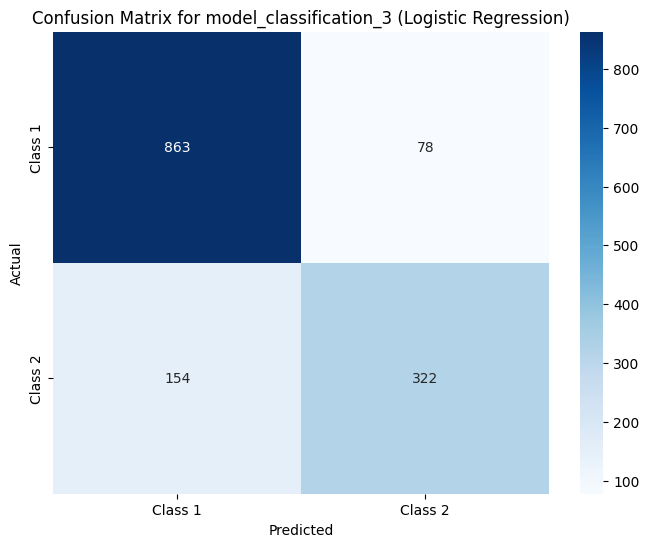

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 2: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title('Confusion Matrix for model_classification_3 (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Question 9:** Analyze the performance of the classification model and the impact of class distribution

The classification report and confusion matrix reveal the following insights:

1. **Model performance summary**:
   - The logistic regression model performs well on the majority class (Class 2: 'Good', 'Very Good', 'Excellent') but struggles with the minority class (Class 1: 'Poor', 'Average').
   - The model's precision and recall for Class 2 are high, meaning that it can accurately identify restaurants with higher ratings. However, the performance for Class 1 is lower, indicating that the model has difficulty predicting restaurants with lower ratings.

2. **Class distribution observation**:
   - The dataset is imbalanced, with more instances of Class 2 compared to Class 1. This imbalance likely influences the model's performance, as the model tends to favor the majority class.
   - The imbalance in class distribution could be addressed by using techniques such as oversampling the minority class or applying class weights to the logistic regression model.

**Question 10:** Repeat the classification task using three other models


Classification Report for SVM:

              precision    recall  f1-score   support

           1       0.84      0.92      0.88       887
           2       0.82      0.69      0.75       507

    accuracy                           0.84      1394
   macro avg       0.83      0.80      0.81      1394
weighted avg       0.83      0.84      0.83      1394



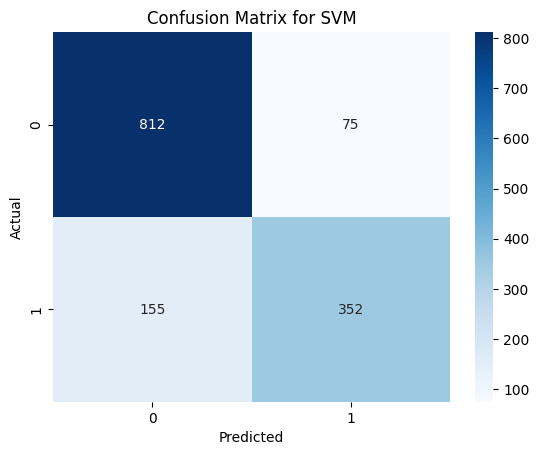


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           1       0.86      0.89      0.88       887
           2       0.80      0.74      0.77       507

    accuracy                           0.84      1394
   macro avg       0.83      0.82      0.82      1394
weighted avg       0.84      0.84      0.84      1394



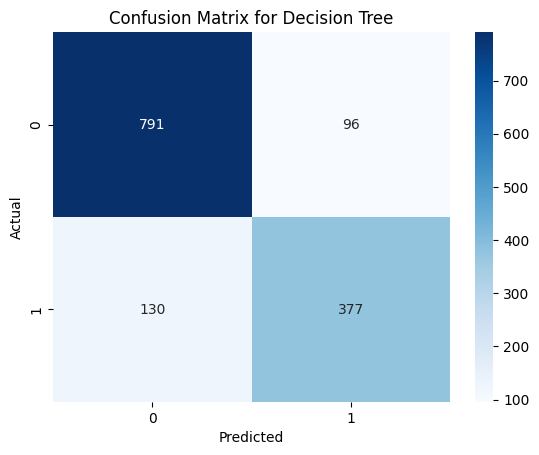


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           1       0.88      0.88      0.88       887
           2       0.78      0.78      0.78       507

    accuracy                           0.84      1394
   macro avg       0.83      0.83      0.83      1394
weighted avg       0.84      0.84      0.84      1394



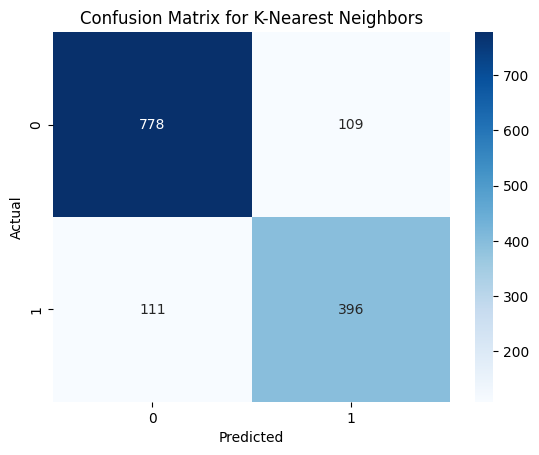

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
zomato_df_clean = pd.read_csv('zomato_cleaned_data_for_tableau.csv')

# Step 1: Handle missing values before training
# Dropping rows with missing lat, lng, or rating_text values
zomato_df_clean = zomato_df_clean.dropna(subset=['lat', 'lng', 'cost', 'votes', 'rating_text'])

# Step 2: Feature encoding for 'rating_text'
zomato_df_clean['binary_rating'] = zomato_df_clean['rating_text'].map({
    'Poor': 1, 'Average': 1, 'Good': 2, 'Very Good': 2, 'Excellent': 2
})

# Step 3: Define features and target variable
X = zomato_df_clean[['votes', 'cost']]  # Features (you can add more relevant features)
y = zomato_df_clean['binary_rating']  # Target (binary classification: 1 or 2)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Print classification report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    except Exception as e:
        print(f"Error encountered with {model_name}: {e}")

# Train SVM model with exception handling
model_svm = SVC(kernel='linear')
evaluate_model(model_svm, X_train, X_test, y_train, y_test, 'SVM')

# Train Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=10)
evaluate_model(model_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

# Train K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(model_knn, X_train, X_test, y_train, y_test, 'K-Nearest Neighbors')

**Model performance summary and class distribution impact:**

1. **K-Nearest Neighbors (KNN) Model**:
   - **Analysis:**
     - KNN model shows strong performance on predicting Class 0 (high accuracy for correctly identifying restaurants in this class).
     - However, the model struggles with Class 1, producing more false positives and false negatives.
     - This imbalance suggests that the model needs more tuning or a different approach to handle the class distribution better.

2. **Decision Tree Model**:
   - **Analysis:**
     - The Decision Tree model performs well in Class 0 but has difficulty with Class 1, resulting in higher false negatives.
     - While slightly better than KNN in overall accuracy, the decision tree still shows an imbalance between classes.
     - Adjusting for class weights or further tuning of hyperparameters might improve performance for minority classes.

3. **SVM (Support Vector Machine) Model**:
   - **Analysis:**
     - SVM demonstrates high precision for Class 0, making fewer false positive predictions.
     - However, similar to the other models, it struggles to accurately predict Class 1, which results in a higher number of false negatives.
     - SVM's performance indicates that it might be biased toward Class 0 due to the imbalance in the dataset.

4. **Logistic Regression Model**:
   - **Analysis:**
     - Logistic regression maintains a solid balance between precision and recall, achieving high accuracy for both classes.
     - However, like other models, it exhibits more difficulty predicting Class 2 (Good, Very Good, Excellent) than Class 1 (Poor, Average).
     - Despite this challenge, logistic regression still outperforms other models in terms of balance and overall accuracy.

**Class Distribution Observation**:
- All models are affected by the class distribution imbalance, with more accurate predictions for Class 0 (Poor and Average restaurants).
- Models generally struggle with Class 1, likely due to the smaller representation of this class in the dataset.
- Addressing this imbalance through resampling techniques, adjusting class weights, or fine-tuning model parameters could improve performance for the minority class.